In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, kendalltau
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress

## Loading the file

In [2]:
file = 'data.csv'
df = pd.read_csv(file)
df

,x,y,z,w
0,-4.382224,-1.421008,-0.328667,-1.421008
1,9.103849,3.155828,0.871590,3.125828
2,3.934759,-2.610013,0.672626,-2.670013
3,-9.421637,5.653598,-0.140550,5.563598
4,-10.627463,-2.468716,-0.042683,-2.588716
...,...,...,...,...
995,-2.858940,28.374312,8.021423,-1.475688
996,-2.510490,26.958925,7.968958,-2.921075
997,-8.996690,26.840496,7.400316,-3.069504
998,1.182692,31.869004,8.078051,1.929004


In [4]:
#checking  for null values
df.isnull().sum()

x    0
y    1
z    0
w    0
dtype: int64

In [5]:
#finding the row that contains the null value

null_rows = df[df['y'].isnull()]
print("row(s) with null value in 'y':")
print(null_rows)


row(s) with null value in 'y':
            x   y         z         w
378 -1.201155 NaN  8.907377 -3.679971


In [6]:
#imputing the missing data using linear interpolation
df.interpolate(method='linear', inplace=True)

In [8]:
#check to see if done
null_rows = df[df['y'].isnull()]
print("row(s) with null value in 'y':")
print(null_rows)

row(s) with null value in 'y':
Empty DataFrame
Columns: [x, y, z, w]
Index: []


## Determining the distribution of each datum

In [9]:
#test for normality
def testNormalitySharp(x):
    stat, p = stats.shapiro(df[column])
    print(stat,p)
    if p>0.05 :
        print(f"{column} is normally distributed\n")
    else:
        print(f"{column} is not normally distributed\n")
    
for column in df.columns:
    testNormalitySharp(column)

0.9518479704856873 1.4188385856021993e-17
x is not normally distributed

0.9923992156982422 5.194791083340533e-05
y is not normally distributed

0.9052633047103882 2.05527493106612e-24
z is not normally distributed

0.9982818365097046 0.42118167877197266
w is normally distributed



## From the above test, w is a normal distribution
**Next we plot the histogram and scatter plots

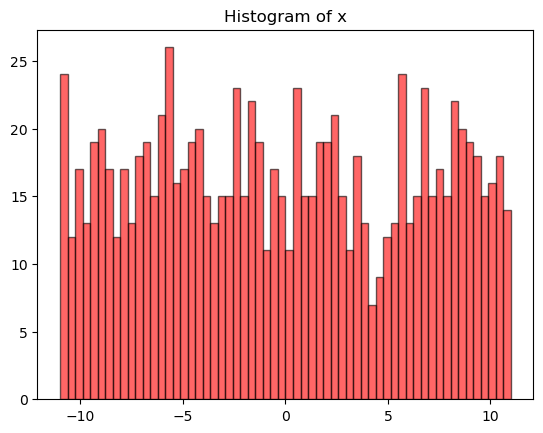

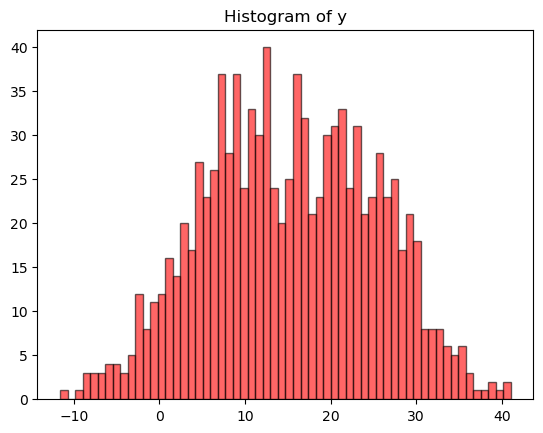

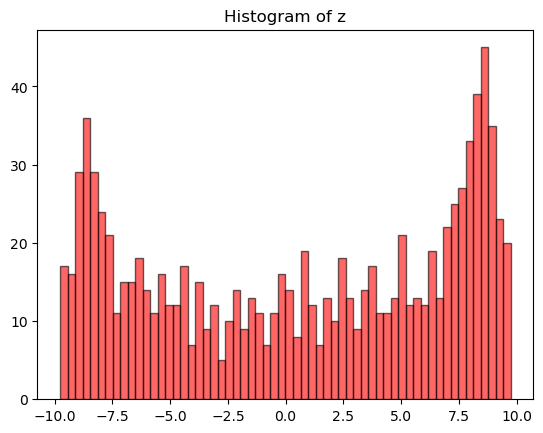

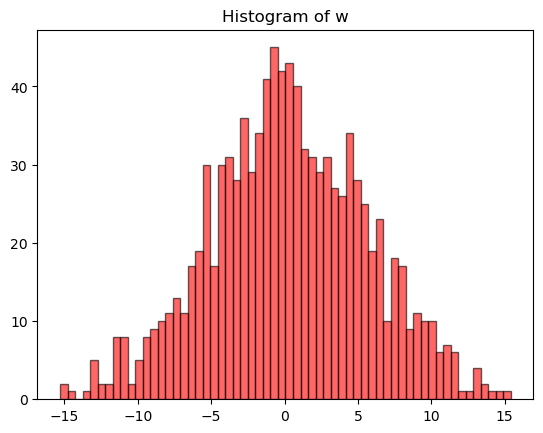

In [23]:
def histogramPlots(a):
    plt.hist(df[column], bins =60, alpha =0.6, color ='red', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.show()
for column in df.columns:
    histogramPlots(column)

## From the histograms above:
**We solidify the notion that w is a normal distribution
** Z is a binomial distribution seeing that it has 2 peaks 
** x is close to continuos uniform but not quite
** y is more of a multi modal distribution seeing it has multiple peaks

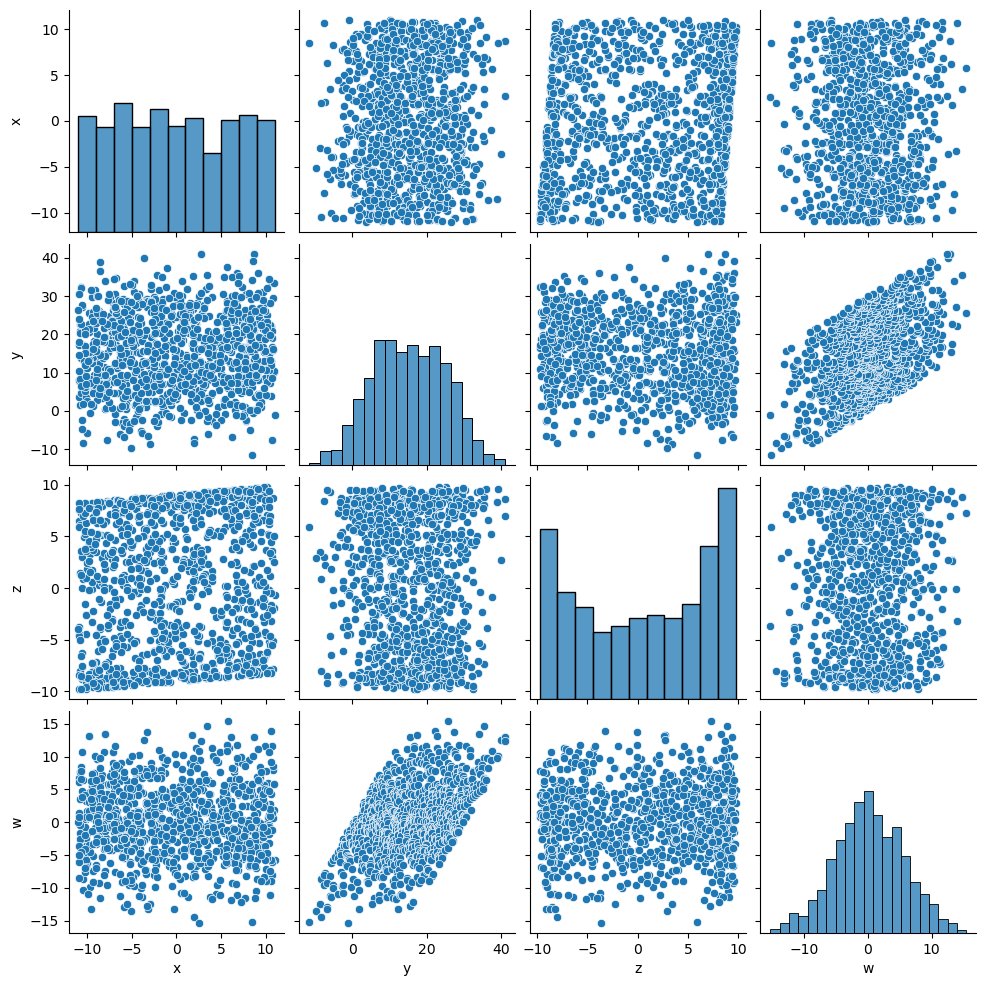

In [24]:
sns.pairplot(df)
plt.show()

## from the pairplot, we see a positive correlation between w and y 


In [40]:
#Spearmn
def statistics(col_a,col_b):
    pearson_correclation, p_val = pearsonr(df[col_a],df[col_b])
    spearman_correlation, p_val2 = spearmanr(df[col_a],df[col_b])
    kendall, p_val3 = kendalltau(df[col_a], df[col_b])
    print(f"Pearson test between {col_a} and {col_b}: Correlation coefficient = {pearson_correclation:.3f}, Pvalue = {p_val:.3g}\n")
    print(f"Spearman test between {col_a} and {col_b}: Correlation coefficient = {spearman_correlation:.3f}, Pvalue = {p_val2:.3g}\n\n")
    print(f"Kendall test  between {col_a} and {col_b}: Correlation coefficient = {kendall:.3f}, Pvalue = {p_val3:.3g}")
for i, a in enumerate(df.columns):
    for b in df.columns[i+1:]:
        #if a!=b:
        statistics(a,b)


Pearson test between x and y: Correlation coefficient = 0.050, Pvalue = 0.112

Spearman test between x and y: Correlation coefficient = 0.048, Pvalue = 0.132


Kendall test  between x and y: Correlation coefficient = 0.032, Pvalue = 0.131
Pearson test between x and z: Correlation coefficient = 0.079, Pvalue = 0.0126

Spearman test between x and z: Correlation coefficient = 0.111, Pvalue = 0.000436


Kendall test  between x and z: Correlation coefficient = 0.077, Pvalue = 0.000254
Pearson test between x and w: Correlation coefficient = 0.007, Pvalue = 0.814

Spearman test between x and w: Correlation coefficient = -0.002, Pvalue = 0.948


Kendall test  between x and w: Correlation coefficient = -0.001, Pvalue = 0.964
Pearson test between y and z: Correlation coefficient = -0.016, Pvalue = 0.604

Spearman test between y and z: Correlation coefficient = -0.013, Pvalue = 0.686


Kendall test  between y and z: Correlation coefficient = -0.009, Pvalue = 0.686
Pearson test between y and w: Co

# we see that there is a correlation between y and w 
 **pearson correlation value 0.4892, Pvalue = 2.59e-61**
 
**Spearman correlation value   0.448, Pvalue = 1.49e-50**

**Kendall correlation value = 0.309, Pvalue = 2.42e-4**

**all p values of the tests between y and w show that this relationship is not by coincidence**

## To determine if it is periodic data, we check the autocorrelation

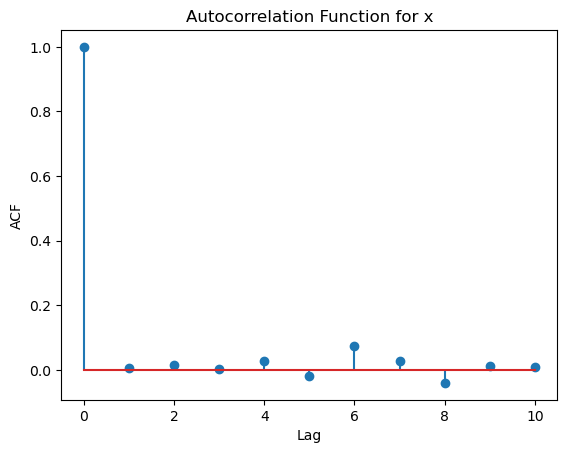

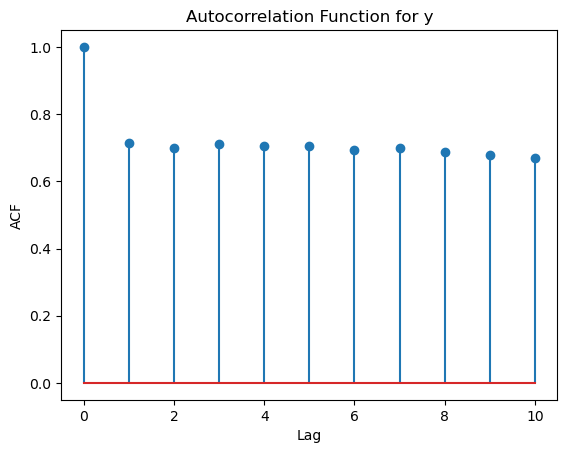

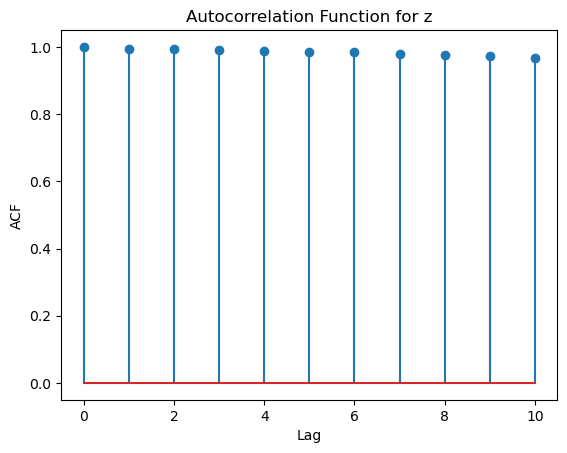

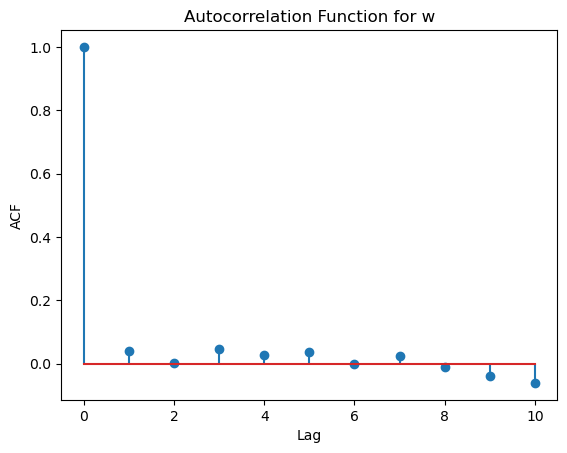

In [48]:
def acfunction(a):
    col_acf = acf(df[a], nlags=10)
    plt.stem(range(len(col_acf)), col_acf, use_line_collection=True)
    plt.title(f'Autocorrelation Function for {a}')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.show()
for a in df.columns:
     acfunction(a)


## from the auto correlation plots, y and z  are a periodic data
## four datums taken at a regular interval (30Hz, time not given) means 30 data points are collected every second
## lag interval =1 (lag between 2 peaks)
## sample rate = 1/30 
## frequency is the inverse which is 30Hz. 


## Seasonal trend analysis

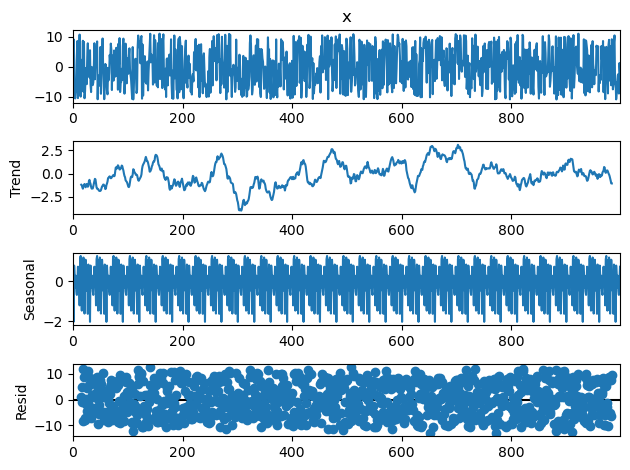

The slope of the trend for x is: 0.0013


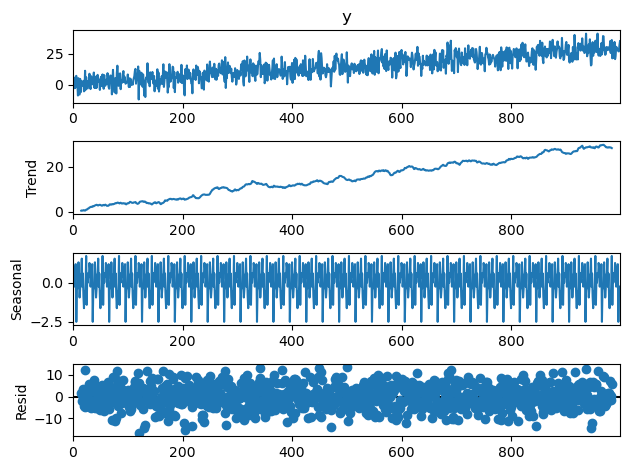

The slope of the trend for y is: 0.0289


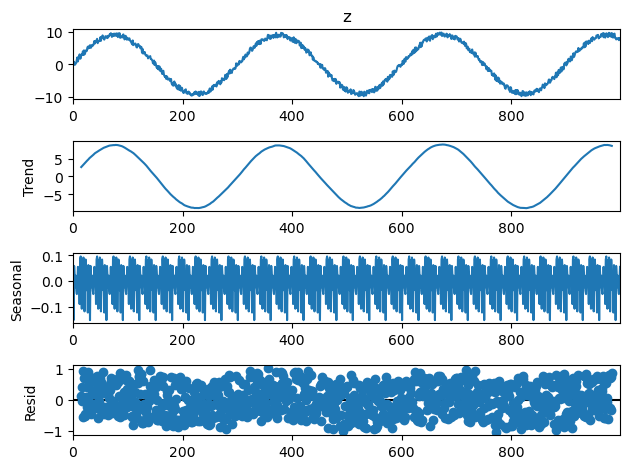

The slope of the trend for z is: -0.0018


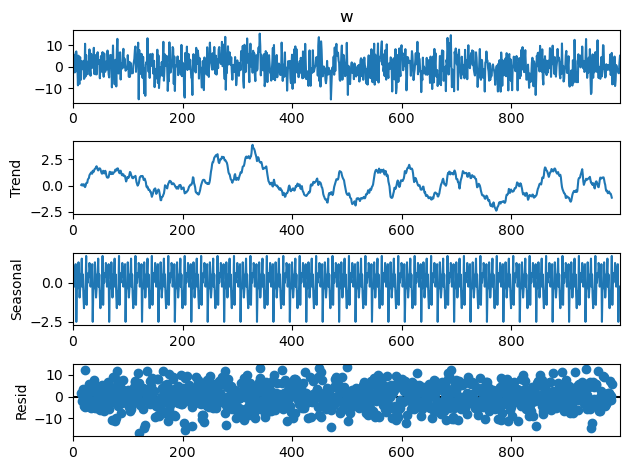

The slope of the trend for w is: -0.0011


In [65]:
def seasonality(a):
    n_points = len(df)
    # Creating a time index from 0 to n_points-1, divided by the sampling rate to get the time in seconds
    df_series = df[a]

    # Decomposing
    result = seasonal_decompose(df_series, model='additive', period=30)  
    result.plot()
    plt.show()
    # slope and trend
    trend_non_null = result.trend.dropna()
    x = np.arange(len(trend_non_null))
    y = trend_non_null.values
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f"The slope of the trend for {a} is: {slope:.4f}")

for col in df.columns:
    seasonality(col)


## The datum with the clearest trend is z
**The slope of the trend for x is: 0.0013**
**The slope of the trend for z is: -0.0018**
**The slope of the trend for w is: -0.0011**
**The slope of the trend for y is: 0.0289**
